<font size='6' color='sky'> <b> Assignment : Linear Regression </b> </font>

<font size='4'> <b>Problem Statement</b> </font> <br><br>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:

    * Which variables are significant in predicting the price of a car
    * How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

<b> Business Goal </b>

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

<font color=Indigo size='5'>Analysis Process</font> <br> <br> 
    The analysis is divided into ten main parts:

1. Data Sourcing, Data Understanding
2. Data cleaning, Manipulation, Visulaization and Detecting Outliers
3. Perform EDA on Prepared Dataset (Univariate and Bivariate Analysis)
4. Model Preparation
5. Training and Testing set Data Split
6. Model Building
7. Residual Analysis of the Train Data
8. Making Predictions
9. Model Evaluation
10. Final Inference

<font size='4'> Import Libraries and set required parameters </font>

In [1]:
import numpy as np
print('numpy version\t:',np.__version__)

import pandas as pd
print('pandas version\t:',pd.__version__)

import seaborn as sns
print('seaborn version\t:',sns.__version__)

import os
import platform
print('Python version\t:',platform.python_version())


# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore') 

# To display all the columns
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 210)

import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import stats

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# Machine Learning related libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


numpy version	: 1.17.3
pandas version	: 0.25.3
seaborn version	: 0.9.0
Python version	: 3.7.5


# Data Sourcing and Understanding the dataset

In [2]:
# Load the dataset in dataframe and take a view
cars=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/a9f2334f-9eb2-4160-8486-701584204e08/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


In [3]:
#Lets check shape of the dataset
cars.shape
print("Number of Rows in cars dataset:",cars.shape[0])
print("Number of Columns in cars dataset:",cars.shape[1])

Number of Rows in cars dataset: 205
Number of Columns in cars dataset: 26


In [4]:
# Let's check datatypes of each column in the dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

As we can see each columns have 205 records, which says there are no missing values. Still, Lets do cross verification using another command

# Data Cleaning, Manipulation, Visualization and Detecting Outliers

## Data Cleaning

In [5]:
#Check if some columns have missing values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Yes, We don't have any missing values in the provided cars dataset

In [6]:
# Finding the duplicates(if any) and dropping them
cars=cars.drop_duplicates()

There are no duplicate records available in the dataset

In [7]:
#The attribute car_ID cannot be used price modeling. So,we can drop it.
cars.drop('car_ID',axis=1,inplace=True)

In [8]:
#Lets check shape of the dataset again
cars.shape
print("Number of Rows in cars dataset left:",cars.shape[0])
print("Number of Columns in cars dataset left:",cars.shape[1])

Number of Rows in cars dataset left: 205
Number of Columns in cars dataset left: 25


<font size='4'> <b> Dataset Descriptive Statistics </b></font> <br> <br>
The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

    - count of that variable
    - mean
    - standard deviation (std)
    - minimum value
    - IQR (Interquartile Range: 25%, 50% and 75%)
    - maximum value

In [9]:
# describe all object columns in cars dataframe 
cars.describe(include = "object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
# describe all numeric columns in cars dataframe 
cars.describe() # By Default describe takes only numeric columns

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,-2.00,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,0.00,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,1.00,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,2.00,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,3.00,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


## Data Manipulation

<i> CarName</i> comprises of 2 parts:

    - first word is the name of 'car company'.
    - second is the 'car model'.
    
For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [11]:
# Splitting CarCompany and its model and taking only car company
cars['car_company'] = cars['CarName'].apply(lambda x: x.split( )[0])
cars.drop('CarName',axis=1,inplace=True)

In [12]:
# Print Unique Car Company Names
cars['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see few company names have been misspelled.So, we need to correct them accordingly

In [13]:
# Print Unique fuelsystem names
cars['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

We can see 'mfi' fuelsystem doesn't mean anything, its nothing but mpfi which is misspelled incorrectly in dataset

In [14]:
# Renaming the mis-spelled Car Brands
cars['car_company'].replace('maxda','mazda',inplace=True)
cars['car_company'].replace('Nissan','nissan',inplace=True)
cars['car_company'].replace('porcshce','porsche',inplace=True)
cars['car_company'].replace('toyouta','toyota',inplace=True)
cars['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

# Renaming the misspelled Fuel Type
cars['fuelsystem'].replace('mfi','mpfi',inplace=True)

In [15]:
# Let's list all categorical Variables
categorical_vars = list(cars.columns[cars.dtypes == 'object'])
print("List of Categorical Variables are :", categorical_vars)

print(" ")

# Let's list all continuous Variables
continuous_vars = list(cars.columns[cars.dtypes != 'object'])
print("List of Continuous Variables are :", continuous_vars)

print(" ")

# Shape of the dataset
cars.shape
print("Number of Rows in cars dataset left:",cars.shape[0])
print("Number of Columns in cars dataset left:",cars.shape[1])

List of Categorical Variables are : ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_company']
 
List of Continuous Variables are : ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
 
Number of Rows in cars dataset left: 205
Number of Columns in cars dataset left: 25


## Data Visualization 
    - After Data Cleaning and Manipulation

<font size='4'> <b>Lets visualize the variables and their pattern w.r.t price(output Variable)</b></font>

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

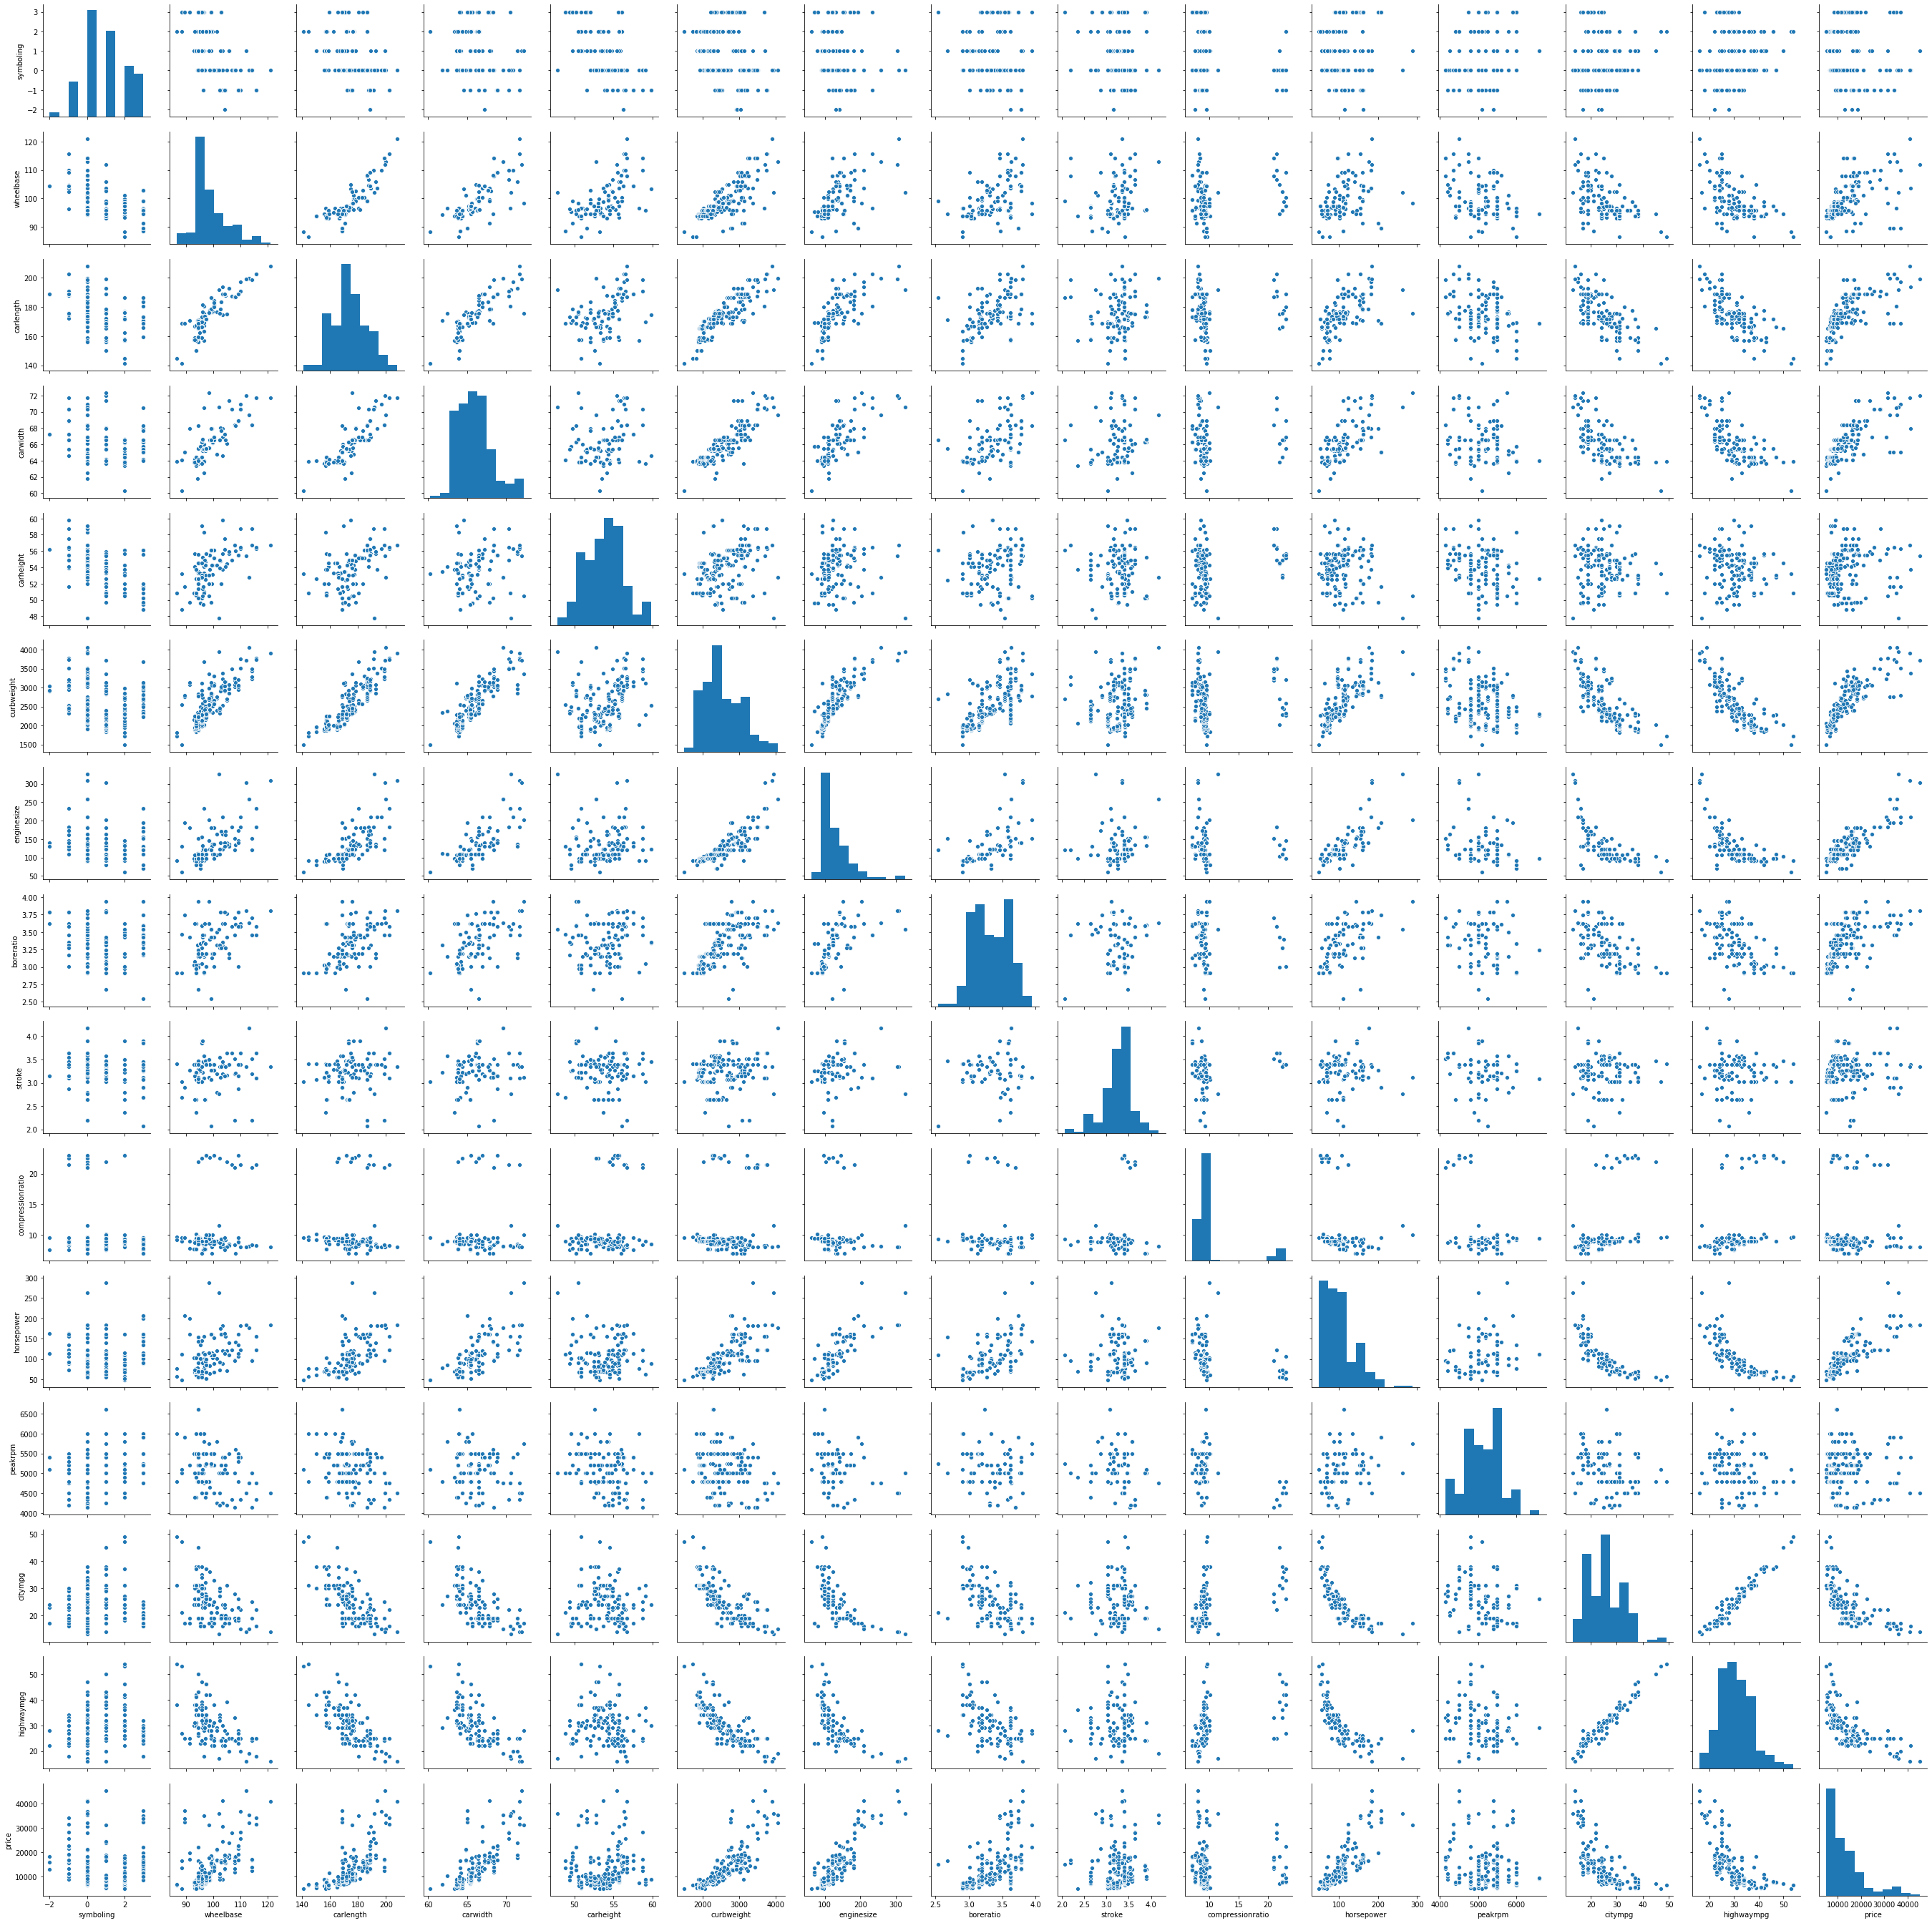

In [16]:
#Visualize the data using seaborn
sns.pairplot(cars)
plt.show()

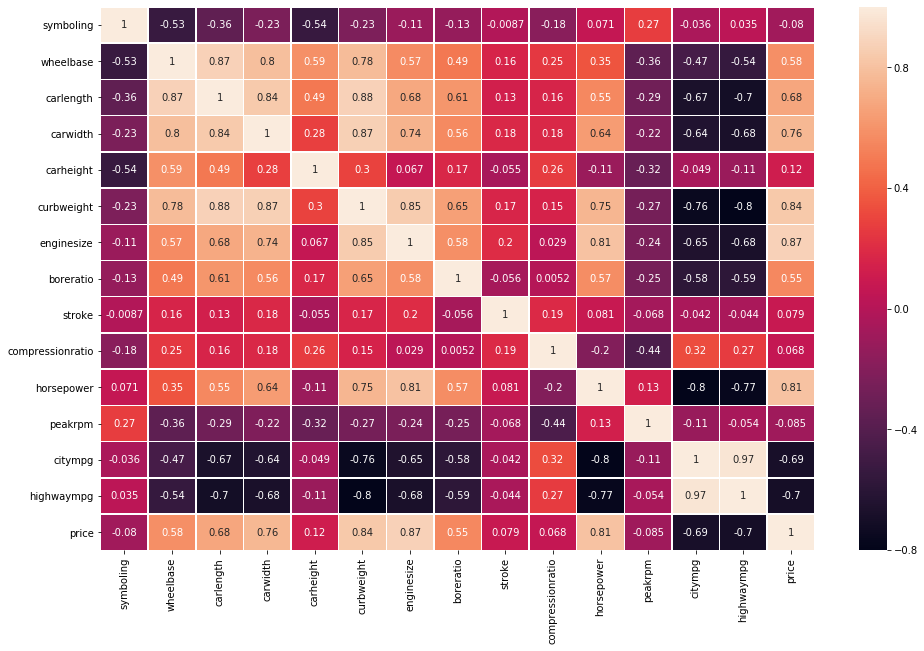

In [17]:
# Let's check correlation between variables 
plt.figure(figsize = (16, 10))
sns.heatmap(cars.corr(), annot = True,linewidths=0.5,linecolor='white')

<font color = DarkCyan size='4'>Insights:</font>

    Now, we have brief idea about which features are related to price. We can see some features have positive relationship with 'price'. These are given as follows:

- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower

However, there are some attributes that show a negative relationship w.r.t price:

 - citympg
 - highwaympg
 
We can also observe some multicollinearity visible between the predictor variables:

1. carlength with wheelbase, carwidth and curbweight
2. curbweight with enginesize, carlength, carwidth and wheelbase
3. enginesize with horsepower, crubweight and dimensions of car
4. highwaympg and citympg are highly correlated (~ 0.97).

## <font size='4'> Detecting Outliers</font>

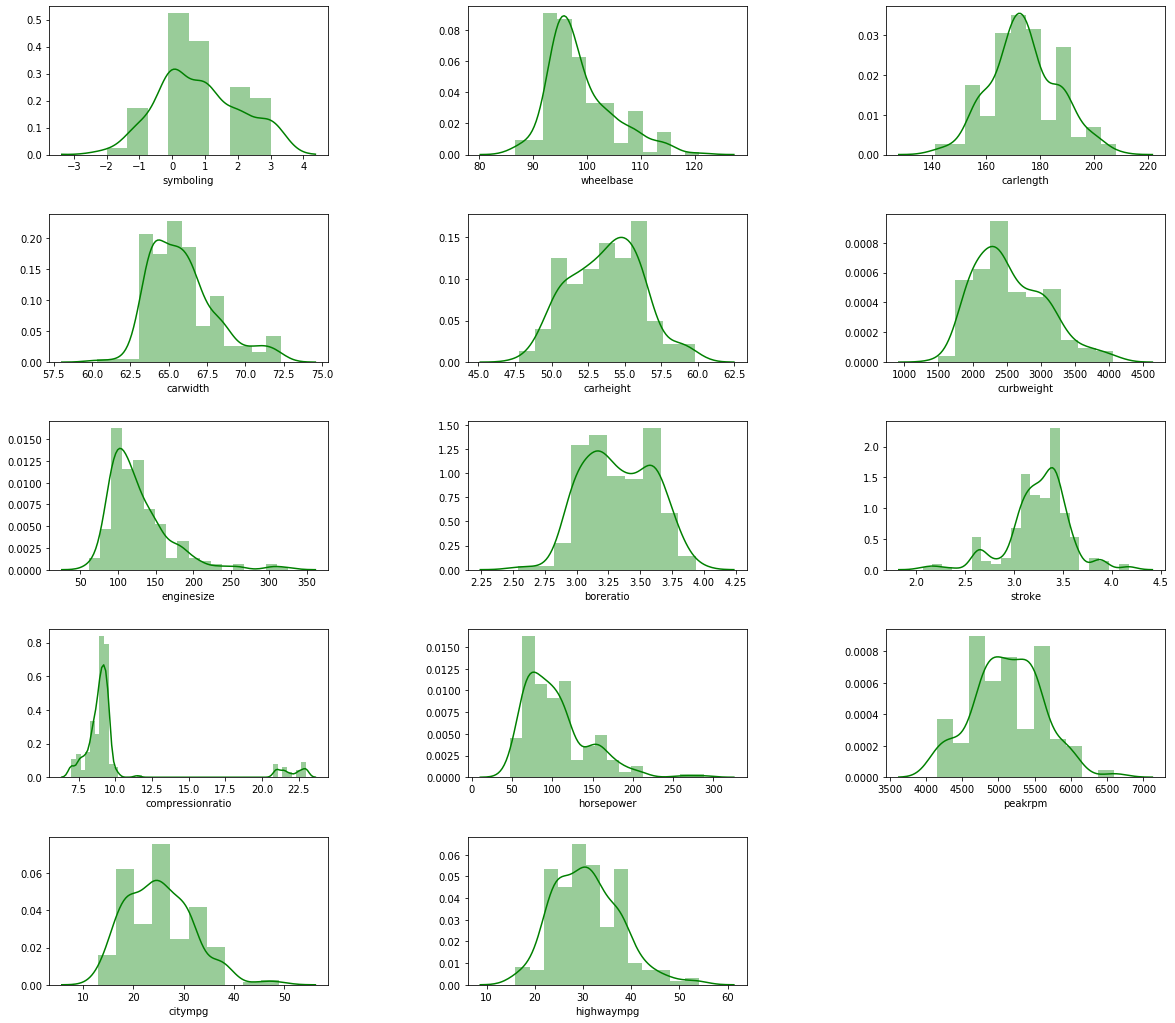

In [18]:
# Detecting outliers in continuous variables
numeric_list = list(cars.columns[cars.dtypes != 'object'])
counter = 1

plt.figure(figsize = (20, 18))

for col_list in numeric_list:
    
    if col_list != 'price':
        
        plt.subplot(5, 3, counter)
        sns.distplot(cars[col_list], hist = True, kde = True, color = 'g')
        
        counter += 1

plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)
plt.show()

<font size='4'> Insights: </font>
    - There are some variables (like compressionratio, wheelbase, horsepower, etc) which are not normally distributed, i.e., outliers are present. Due to presence of less number of observation, we are not deleting some rows to correct the outliers. We will be doing the scaling in both train and test data to correct this during Model preparation.

# Perform EDA on Prepared Dataset
## Univariate Analysis

In [19]:
# Custom Function to add data labels

def labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

In [20]:
#Function to plot the percentage of car's in the US market with respect to different car features
def plot(df,var_list, sortbyindex=False):
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (df[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('muted', 16))
        ax.set_ylabel('Percentage  Distribution', fontsize=12)
        ax.set_xlabel(var, fontsize=10)
        labels(ax)
        

def plot_cat(var_list):
    #Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = cars)
    plt.show()

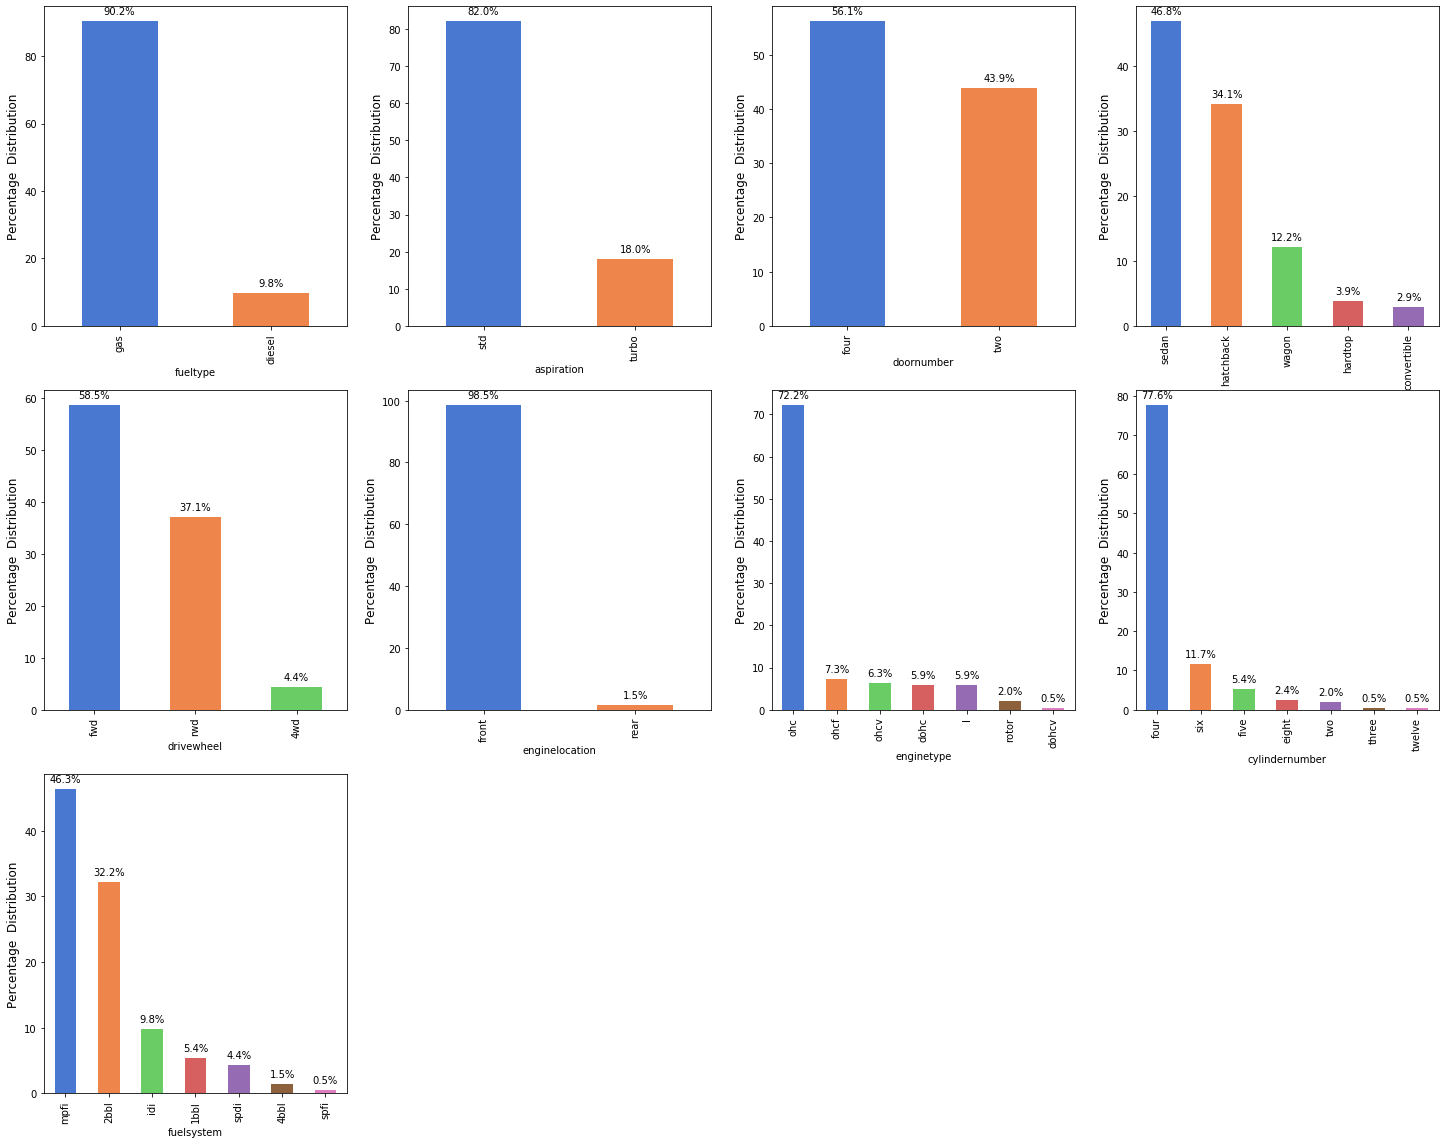

In [21]:
#plotting market percentage of car's with respect to features
plt.figure(figsize=(25, 20))
plot(cars,categorical_vars[:-1])

<font size='4'>Insights:</font>
    - We can see that some of the car features are popular in the US Automobile Market. Geely Auto can consider these analysis results to satisfy the market needs and make the required changes to their manufacturing line.

<font color = DarkCyan size='3'>Univariate Analysis Observations:</font>

1. Most preferred fuel type:
    - gas (90.24%)

2. Most preferred aspiration:
    - std (81.95%)

3. Most preferred door number:
    - four (56.10%)

4. Top 3 preferred car body:
    - sedan (46.83%)
    - hatchbag (34.15%)
    - wagon (12.20%)

5. Top 2 preferred drive wheel:
    - fwd (58.54%)
    - rwd (37.07%)

6. Most preferred engine location:
    - front (98.54%)

7. Most preferred engine type:
    - ohc (77.20%)

8. Most preferred cylinder number:
    - four (77.56%)

9. Most preferred fuel system:
    - mpfi (77.20%)


Let's see which company is most popular in the US Automobile market

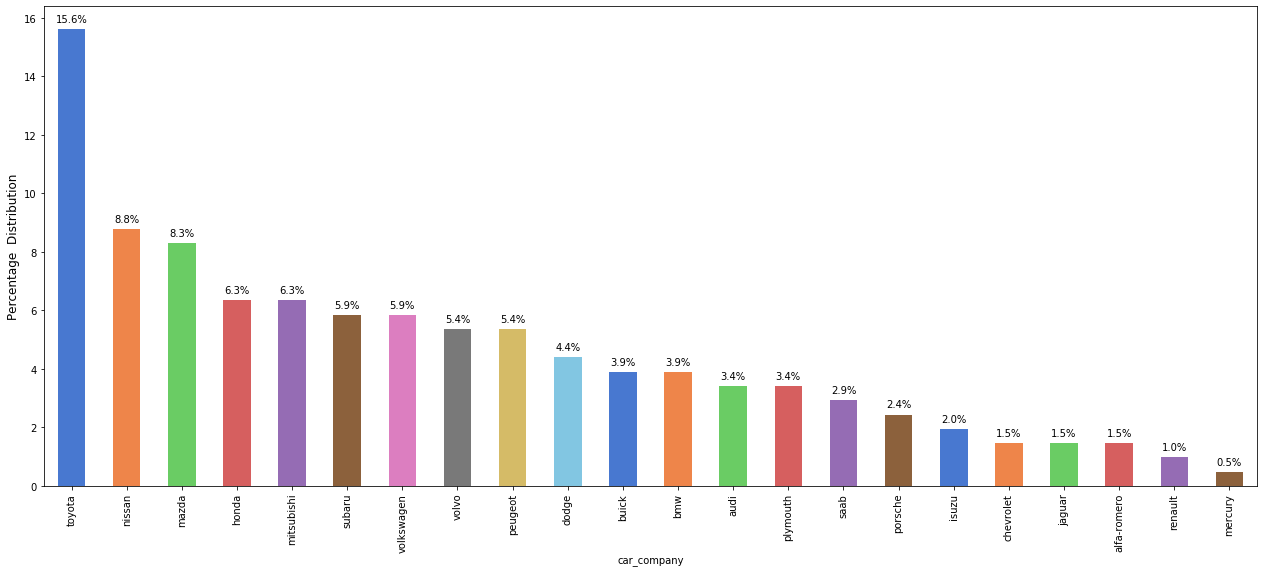

In [22]:
# Plot of Percentage distribution vs Car Company
plt.figure(figsize=(100, 30))
plot(cars,[categorical_vars[-1]])

<font size='4'> Insights: </font>

    - We can clearly see that Toyota dominates with 15.6% followed by Nissan with 8.8%, Mazda with 8.2%
    - Mitsubishi and Honda are equally popular with 6.3% market percentage.


<font size='4'> Target Variable : Price </font>

Let's see how these categorical variables relate individually with price.

<Figure size 1080x1800 with 0 Axes>

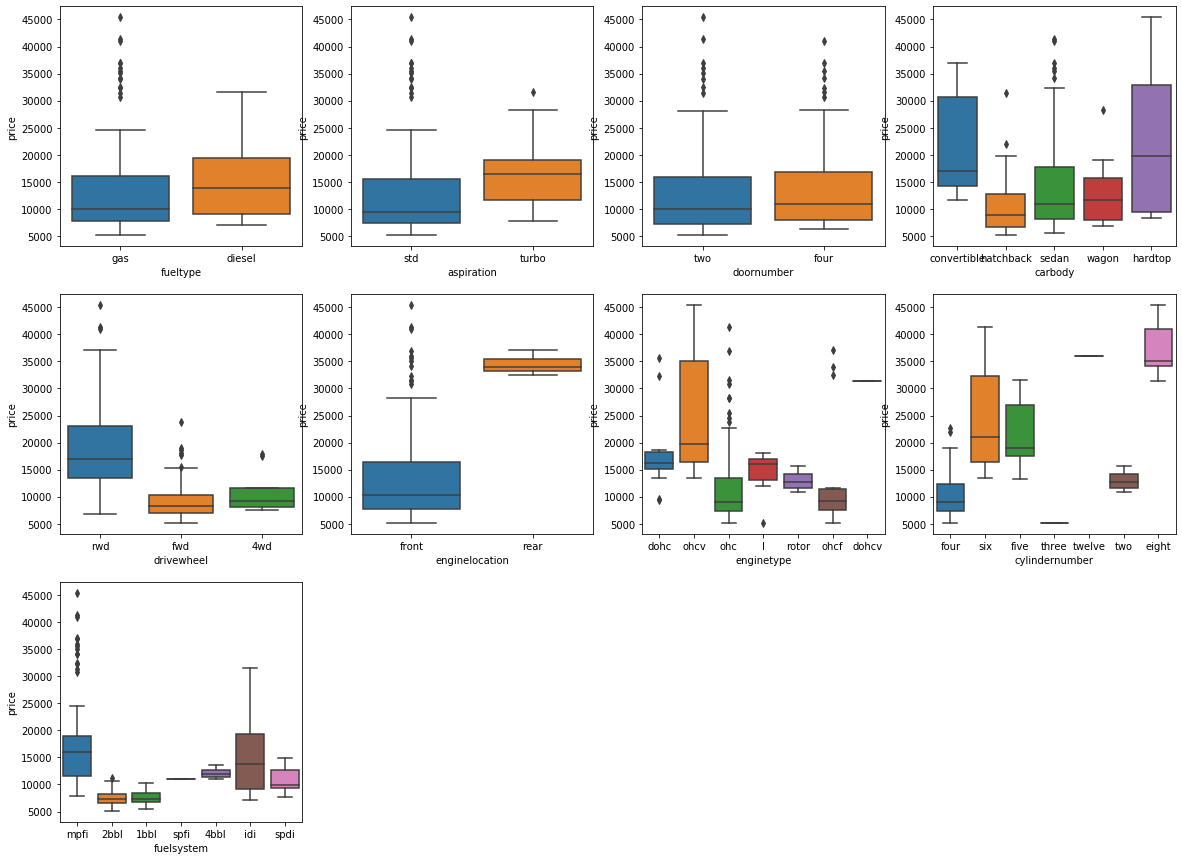

In [23]:
# ploting all the attributes excluding car_company against price
plt.figure(figsize=(15, 25))
plot_cat(categorical_vars[:-1])

<font size='4'>Insights:</font>

1. There are some outliers explaining the fact that the companies produce cars of much higher price range than normal market price.

2. There is no major significance of price based on fuel type with the exception of expensive cars belonging to fueltype gas.

3. Turbo aspiration is bit higher than standard aspiration. Exception - Expensive Cars

4. Drive Wheel of rwd (rear wheel drive) is expensive than 4wd (four wheel drive) and fwd (fron wheel drive)

5. Rear Enging location is expensive than front.

6. Price increases as the cylinder number increases.

Average car price in US:  13276.710570731706
car_company
jaguar    34,600.00
buick     33,647.00
porsche   31,400.50
bmw       26,118.75
volvo     18,063.18
Name: price, dtype: float64


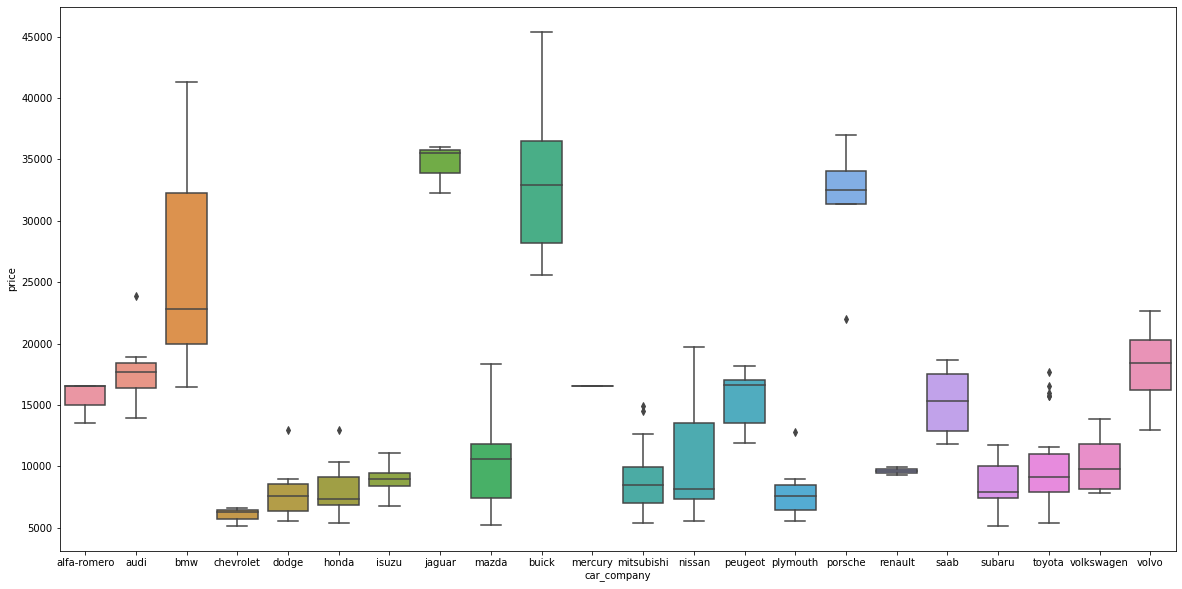

In [24]:
# Plot of price vs various automobiles type
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_vars[-1], y = 'price', data = cars)

print('Average car price in US: ',cars['price'].mean())
print(cars.groupby('car_company').price.mean().sort_values(ascending=False).head())

<font size='4'> Insights:</font>

1. There are some outliers for the companies which demonstrates that they do manufacture some expensive cars that are priced above their usual market pricing range.
2. Cars manufacturers like Jaguar, Buick, Porsche, BMW and Volo are on the high end side and are priced well above the other US cars which have an average price of approx. $13,000.
3. Also, company name shows some affect on the price determination.

## Bivariate Analysis

### For Categorical Variables

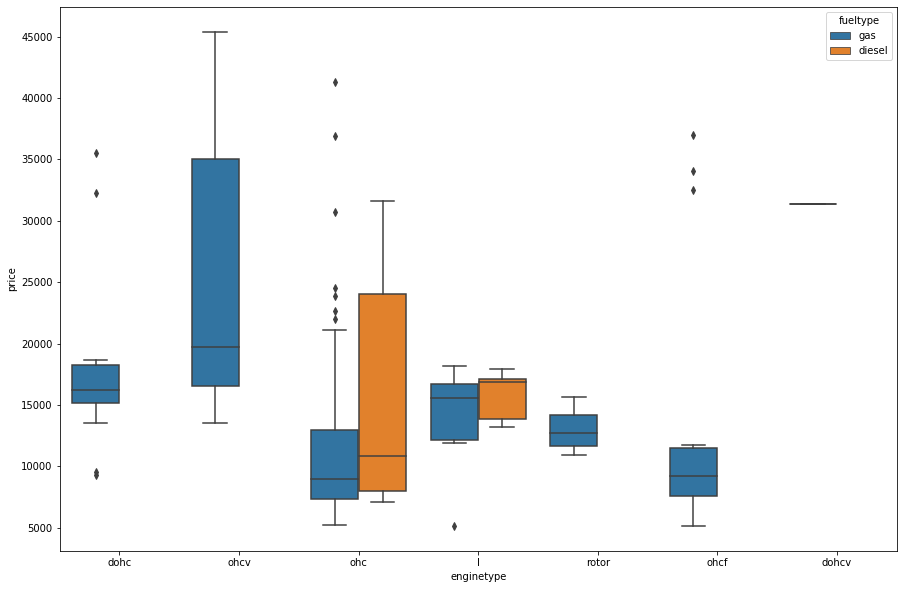

In [25]:
# Plotting of EngineType and FuelType w.r.t price

plt.figure(figsize=(15,10))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=cars)

<font size='4'>Insights: </font>
    - OHCV Engine type cars are costliest.
    - Engine type ohcv have higher mean price than ohc and ohcf

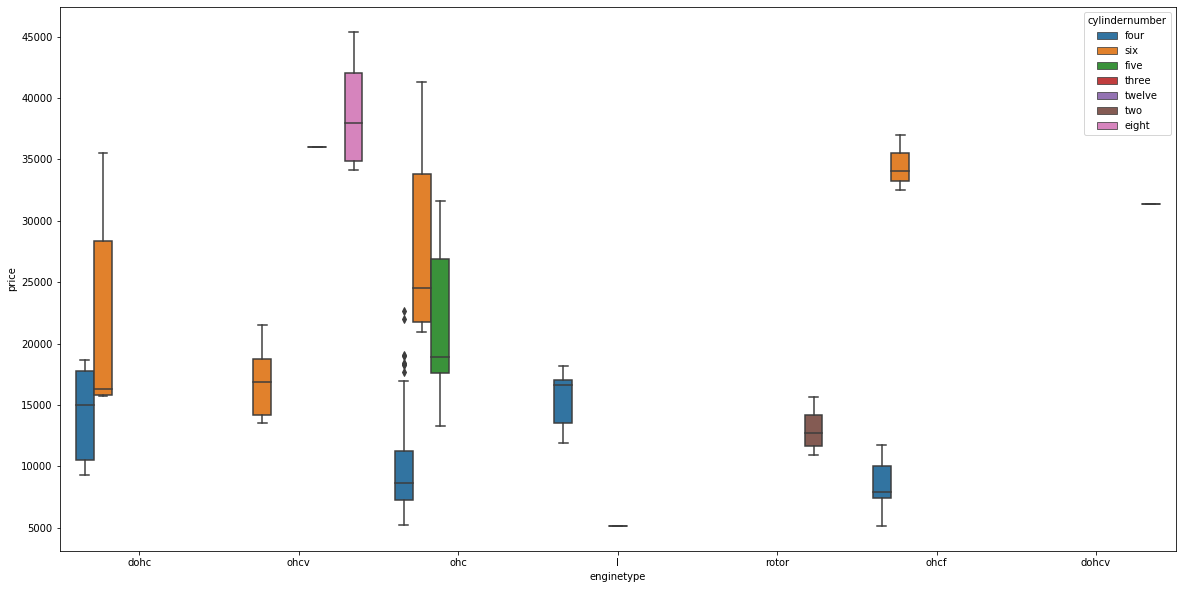

In [26]:
# Plotting of Enginetype vs CylinderNumber w.r.t proice
plt.figure(figsize=(20,10))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=cars)

<font size='4'>Insights: </font>
    - OHCV Engine cars with 8 cylinders seems to be most expensive.
    - Cars with 4 cylinders are cost effective compare to other cylindernumber type irrespective of Enginevtype

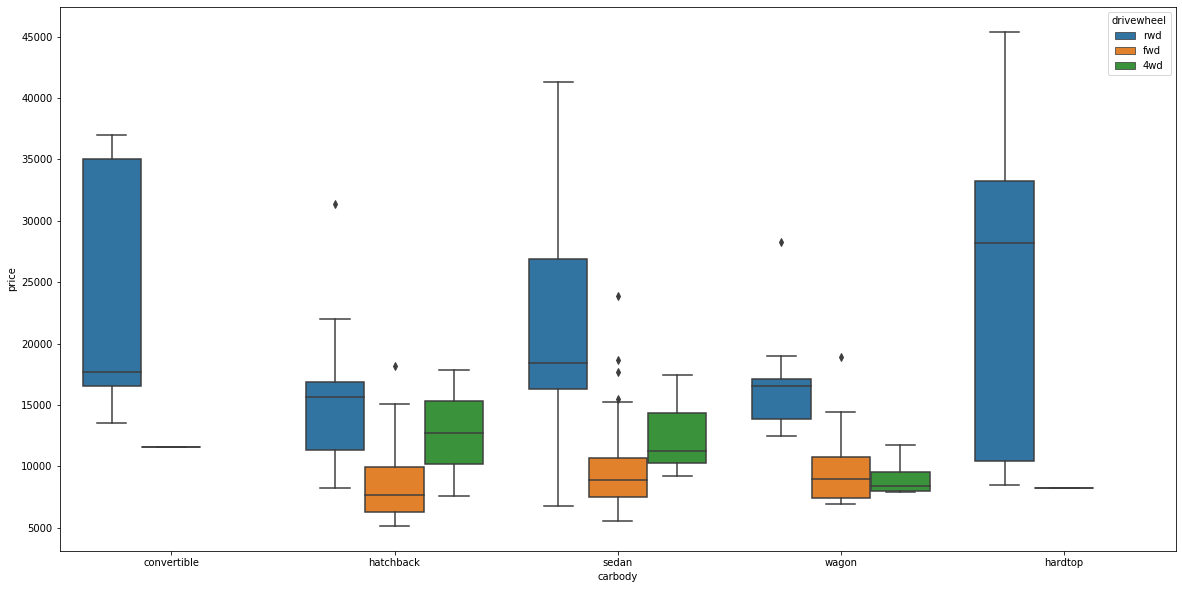

In [27]:
# Plotting of Carbody vs Driverwheel w.r.t Price
plt.figure(figsize=(20,10))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=cars)

<font size='4'>Insights: </font>
    - Hatchback,Sedan and Wagon bodytype cars are least expensive with fwd driverwheel model
    - Hardtop car body is most expensive model w.r.t driver wheel

### For Continuous Variables

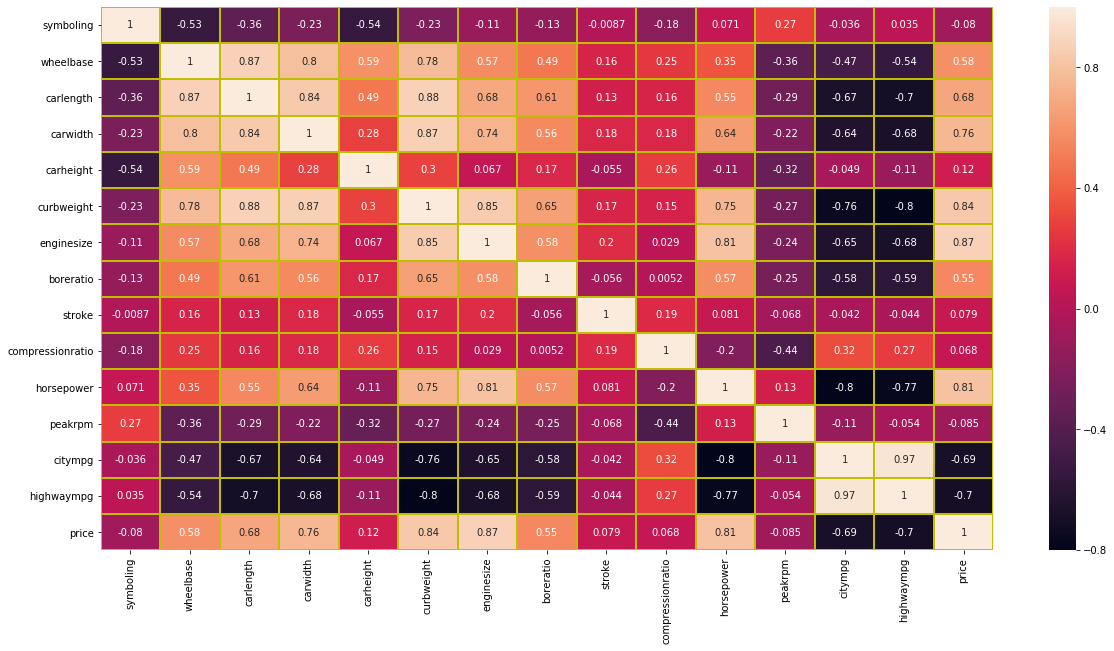

In [28]:
# Generate heat map

plt.figure(figsize = (20,10))  

sns.heatmap(cars.corr(),annot = True,linewidths=1,linecolor='y')

<font size='4'>Bivariate Analysis - Continuous Variables Observations:</font> <br> <br>
Price is positively correlated with:
1. enginesize (0.87)
2. curbweight (0.84)
3. horsepower (0.81)
4. carwidth (0.76)
5. carlength (0.68)

Price is negatively correlated with:
1. highwaympg (-0.7)
2. citympg (-0.69)

There is a high correlation between highwaympg and citympg (Corr value = 0.97).


<font size='4'> Derived Variables </font>
    - As from the heatmap, we noticed there is a high correlation between carlength, carwidth, carheight and city vs highway mpg's. Let us create new derived variables so that we can reduce multicollinearlity.

In [29]:
# Creating Derived variables 
cars['car_dimension']=cars.carlength*cars.carwidth*cars.carheight
cars['hc_mpg_ratio'] = cars.highwaympg/cars.citympg

## dropping the orignal variables
cars.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

# Model Preparation

<font size='4'>Symboling:</font> <br> <br>
    - As per Data Dictionary, Variable symboling is insurance risk rating with +3 as risky and -3 as pretty safe. Since it is a categorical field, so the values can be divided into categories like:

1. risky for range [2, 3]
2. moderate for range [0, 1]
3. safe for range [-1, -3]

In [30]:
# Initial Value of variable symboling
cars.symboling.value_counts(sort = False, dropna = False)

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [31]:
# Set values in the variable symboling using dictionary
cars['symboling'] = cars['symboling'].map({ 3: 'risky',
                                          2: 'risky',
                                          1: 'moderate',
                                          0: 'moderate',
                                         -1: 'safe',
                                         -2: 'safe',
                                         -3: 'safe'})

# Mapping the column as Category data type
cars['symboling'] = cars['symboling'].astype('str')

# Final Value of variable symboling
cars.symboling.value_counts(sort = False, dropna = False)

risky        59
moderate    121
safe         25
Name: symboling, dtype: int64

We saw that the company brand value also is determinig the price of the car. Let us create a company_seg categorical variable which would tell us that under which segment tier does the car_company comes under. We will segment the car companies based on the mean company price as

1. Low price if company mean price is below 10,000
2. Medium price if company mean price is above 10,000 and below 20,000
3. Expensive if company mean price is above 20,000

In [32]:
# Summary Statistics of car company with price
cars[['car_company', 'price']].describe()

,price
count,205.00
mean,"13,276.71"
std,"7,988.85"
min,"5,118.00"
25%,"7,788.00"
50%,"10,295.00"
75%,"16,503.00"
max,"45,400.00"


In [33]:
# Companies car Avergae price from higher to lower
cars.groupby('car_company').price.median().sort_values(ascending=False)

car_company
jaguar        35,550.00
buick         32,892.00
porsche       32,528.00
bmw           22,835.00
volvo         18,420.00
audi          17,710.00
peugeot       16,630.00
mercury       16,503.00
alfa-romero   16,500.00
saab          15,275.00
mazda         10,595.00
volkswagen     9,737.50
renault        9,595.00
toyota         9,103.00
isuzu          8,916.50
mitsubishi     8,499.00
nissan         8,124.00
subaru         7,894.00
plymouth       7,609.00
dodge          7,609.00
honda          7,295.00
chevrolet      6,295.00
Name: price, dtype: float64

In [34]:
# Function to get company_category
def get_company_category():
    
    for company_list in cars.car_company.unique():
        
        df = cars[cars['car_company'] == company_list]
        
        if df.price.median() > 20000:
            category = 'Expensive'
        elif df.price.median() > 10000:
            category = 'Midprice'        
        else:
            category = 'Lowprice'
        
        cars.loc[cars['car_company'] == company_list, 'company_category'] = category
        
    # Mapping the column as string data type
    cars['company_category'] = cars['company_category'].astype('str')

# Call Function
get_company_category()

# Data Glimpse
pd.crosstab(cars.car_company, cars.company_category)

company_category,Expensive,Lowprice,Midprice
car_company,,,
alfa-romero,0,0,3
audi,0,0,7
bmw,8,0,0
buick,8,0,0
chevrolet,0,3,0
dodge,0,9,0
honda,0,13,0
isuzu,0,4,0
jaguar,3,0,0


In [35]:
# Cars Category grouped by mean price
cars.groupby('company_category').price.mean()

company_category
Expensive   30,788.69
Lowprice     9,226.17
Midprice    14,812.97
Name: price, dtype: float64

<font size='4'>Binary Encoding:</font> 
    - Mapping Variables like fueltype, aspiration, enginelocation and doornumber to binary values (0, 1).

In [36]:
# Converting categorical variables with two levels to either 1 or 0
cars['fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars['aspiration'] = cars['aspiration'].map({'std': 1, 'turbo': 0})
cars['doornumber'] = cars['doornumber'].map({'two': 1, 'four': 0})
cars['enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_company,car_dimension,hc_mpg_ratio,company_category
0,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,"13,495.00",alfa-romero,"528,019.90",1.29,Midprice
1,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,"16,500.00",alfa-romero,"528,019.90",1.29,Midprice
2,moderate,1,1,1,hatchback,rwd,1,94.50,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,"16,500.00",alfa-romero,"587,592.64",1.37,Midprice
3,risky,1,1,0,sedan,fwd,1,99.80,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,"13,950.00",audi,"634,816.96",1.25,Midprice
4,risky,1,1,0,sedan,4wd,1,99.40,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,"17,450.00",audi,"636,734.83",1.22,Midprice


In [37]:
# Dropping the orignal car_company variable to avoid unnecessary dummy variables creation
cars.drop('car_company',axis=1,inplace=True)
print("Shape of the Dataframe is :",cars.shape)
cars.head()

Shape of the Dataframe is : (205, 22)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_dimension,hc_mpg_ratio,company_category
0,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,"13,495.00","528,019.90",1.29,Midprice
1,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,"16,500.00","528,019.90",1.29,Midprice
2,moderate,1,1,1,hatchback,rwd,1,94.50,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,"16,500.00","587,592.64",1.37,Midprice
3,risky,1,1,0,sedan,fwd,1,99.80,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,"13,950.00","634,816.96",1.25,Midprice
4,risky,1,1,0,sedan,4wd,1,99.40,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,"17,450.00","636,734.83",1.22,Midprice


In [38]:
#Create Dummies for the categorical Variables
categorical_vars = list(cars.columns[cars.dtypes == 'object'])
print("List of Categorical Variables are :", categorical_vars)

print(" ")

cars=pd.get_dummies(cars, columns=categorical_vars)

List of Categorical Variables are : ['symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'company_category']
 


In [39]:
#Lets check the shape of dataframe
print("Shape of Cars Dataframe now is :",cars.shape)

# Let's have a look at cars dataframe
cars.head()

Shape of Cars Dataframe now is : (205, 50)


,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_dimension,hc_mpg_ratio,symboling_moderate,symboling_risky,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_Expensive,company_category_Lowprice,company_category_Midprice
0,1,1,1,1,88.60,2548,130,3.47,2.68,9.00,111,5000,"13,495.00","528,019.90",1.29,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,88.60,2548,130,3.47,2.68,9.00,111,5000,"16,500.00","528,019.90",1.29,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,1,1,94.50,2823,152,2.68,3.47,9.00,154,5000,"16,500.00","587,592.64",1.37,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,0,1,99.80,2337,109,3.19,3.40,10.00,102,5500,"13,950.00","634,816.96",1.25,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,1,0,1,99.40,2824,136,3.19,3.40,8.00,115,5500,"17,450.00","636,734.83",1.22,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Training and Testing Set Data Splitting

In [40]:
# from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

<font size='4'> Feature Scaling </font>
    - Now, we will scale those variables whose min and max range is quite high compare to other columns

In [41]:
# from sklearn.preprocessing import MinMaxScaler

# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [42]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio',
            'car_dimension','stroke','compressionratio','peakrpm','price','hc_mpg_ratio']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_dimension,hc_mpg_ratio,symboling_moderate,symboling_risky,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_Expensive,company_category_Lowprice,company_category_Midprice
122,1,1,0,1,0.24,0.27,0.14,0.23,0.53,0.15,0.08,0.55,0.07,0.24,0.35,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
125,1,1,1,1,0.27,0.50,0.34,1.00,0.46,0.16,0.40,0.55,0.47,0.34,0.65,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
166,1,1,1,1,0.27,0.31,0.14,0.44,0.45,0.15,0.27,1.00,0.12,0.31,0.18,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,0.07,0.41,0.26,0.63,0.25,0.12,0.26,0.35,0.31,0.20,0.44,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
199,1,0,0,1,0.61,0.65,0.26,0.75,0.48,0.03,0.48,0.39,0.38,0.75,0.45,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [43]:
#Describe the train dataset to check the minmax range should be between 0 and 1
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_dimension,hc_mpg_ratio,symboling_moderate,symboling_risky,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_Expensive,company_category_Lowprice,company_category_Midprice
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.91,0.82,0.44,0.99,0.41,0.41,0.24,0.50,0.54,0.19,0.23,0.40,0.22,0.44,0.36,0.65,0.24,0.10,0.03,0.02,0.34,0.48,0.13,0.06,0.59,0.35,0.07,0.01,0.06,0.69,0.08,0.06,0.03,0.02,0.06,0.74,0.13,0.01,0.01,0.03,0.06,0.35,0.02,0.09,0.44,0.04,0.00,0.12,0.62,0.27
std,0.29,0.39,0.50,0.08,0.21,0.21,0.15,0.21,0.16,0.24,0.17,0.20,0.22,0.22,0.14,0.48,0.43,0.31,0.17,0.14,0.48,0.50,0.34,0.23,0.49,0.48,0.26,0.08,0.24,0.47,0.28,0.24,0.17,0.14,0.24,0.44,0.34,0.08,0.08,0.17,0.23,0.48,0.14,0.29,0.50,0.20,0.00,0.32,0.49,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.00,0.27,0.25,0.14,0.31,0.46,0.10,0.09,0.27,0.07,0.28,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,1.00,0.34,0.36,0.18,0.50,0.55,0.12,0.19,0.43,0.14,0.39,0.35,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,1.00,1.00,1.00,0.50,0.56,0.30,0.68,0.61,0.15,0.28,0.55,0.31,0.56,0.41,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00


In [44]:
# Let's seperate the dependent variable from the train dataset
y_train = df_train.pop('price')
X_train = df_train

# Model Building
Let us follow a mixed approach.

    - Initially, we shall use the LinearRegression function from SciKit Learn for its compatibility with RFE.
    - Then we will be using the statsmodels for statistics analysis of the model

In [45]:
# Creating lm object
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE and selecting  best 15 features for describing the price of cars
rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 8),
 ('aspiration', False, 14),
 ('doornumber', False, 32),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', True, 1),
 ('compressionratio', False, 9),
 ('horsepower', True, 1),
 ('peakrpm', False, 2),
 ('car_dimension', False, 16),
 ('hc_mpg_ratio', False, 15),
 ('symboling_moderate', False, 30),
 ('symboling_risky', False, 29),
 ('symboling_safe', False, 22),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 25),
 ('carbody_hatchback', False, 24),
 ('carbody_sedan', False, 26),
 ('carbody_wagon', False, 23),
 ('drivewheel_4wd', False, 31),
 ('drivewheel_fwd', False, 28),
 ('drivewheel_rwd', False, 33),
 ('enginetype_dohc', False, 19),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 21),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 17),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', False, 20)

In [47]:
# Top 15 columns which looks effective to train the model after performing RFE
cols = X_train.columns[rfe.support_]
cols

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'stroke',
       'horsepower', 'carbody_convertible', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_idi',
       'company_category_Expensive'],
      dtype='object')

In [48]:
# List of columns which are less effective than top 15 columns in building the model
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'boreratio', 'compressionratio',
       'peakrpm', 'car_dimension', 'hc_mpg_ratio', 'symboling_moderate',
       'symboling_risky', 'symboling_safe', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_category_Lowprice', 'company_category_Midprice'],
      dtype='object')

<font size='4'> Now, Building model using statsmodels library, for the detailed statistics </font>

In [49]:
# Define a function for populate the statsmodel summary
def fitLR(X_train_rfe):
    
    # Adding a constant variable
    # import statsmodels.api as sm
    X_train_rfe = sm.add_constant(X_train_rfe)
    
    # Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()
    
    # Print Summary of linear model
    print(lm.summary())
    
    return lm

<font size='4'>Checking VIF: </font>

    - Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

 <font size='5'> $ VIF_i = \frac{1}{1 - {R_i}^2} $ 
 </font>

In [50]:
# Function to get VIF
def Cal_VIF(X_train):
    
    vif = pd.DataFrame()
    
    X = X_train
    
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return(vif)

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [52]:
# Call fitLR Function to get OLS Regression Results
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.14e-71
Time:                        22:14:42   Log-Likelihood:                 217.87
No. Observations:                 143   AIC:                            -405.7
Df Residuals:                     128   BIC:                            -361.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

P value of curbweight is greater than 0.05, so lets remove this column

In [53]:
# Drop Column
X_train_rfe.drop(columns = 'curbweight', axis = 1, inplace = True)

In [54]:
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.52e-71
Time:                        22:14:42   Log-Likelihood:                 216.75
No. Observations:                 143   AIC:                            -405.5
Df Residuals:                     129   BIC:                            -364.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Now the P-value of all variables looks well below 0.05. So, lets have a look at VIF values of variables

In [55]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,48.35
3,stroke,32.03
0,enginelocation,21.71
4,horsepower,17.65
1,wheelbase,12.88
7,enginetype_ohc,9.72
13,company_category_Expensive,3.49
10,cylindernumber_twelve,1.81


In [56]:
# Drop Column with high vif
X_train_rfe.drop(columns = 'cylindernumber_two', axis = 1, inplace = True)

In [57]:
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.52e-71
Time:                        22:14:42   Log-Likelihood:                 216.75
No. Observations:                 143   AIC:                            -405.5
Df Residuals:                     129   BIC:                            -364.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
2,enginesize,48.35
3,stroke,32.03
0,enginelocation,21.71
4,horsepower,17.65
1,wheelbase,12.88
7,enginetype_ohc,9.72
12,company_category_Expensive,3.49
8,enginetype_rotor,2.10
10,cylindernumber_twelve,1.81
11,fuelsystem_idi,1.70


In [59]:
# Drop Column with high VIF
X_train_rfe.drop(columns = 'enginesize', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.23e-69
Time:                        22:14:42   Log-Likelihood:                 209.05
No. Observations:                 143   AIC:                            -392.1
Df Residuals:                     130   BIC:                            -353.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Now, here we can see, moment we drop engine size, P values of few other variables crossed 0.05. Lets identify them one by one and start eliminating them

In [60]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
2,stroke,23.24
0,enginelocation,21.63
1,wheelbase,10.77
3,horsepower,9.61
6,enginetype_ohc,7.66
11,company_category_Expensive,2.09
10,fuelsystem_idi,1.69
5,enginetype_dohcv,1.38
9,cylindernumber_twelve,1.32
4,carbody_convertible,1.23


In [61]:
# Drop Column as its has p-value greater than 0.05
X_train_rfe.drop(columns = 'cylindernumber_twelve', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.45e-70
Time:                        22:14:42   Log-Likelihood:                 207.99
No. Observations:                 143   AIC:                            -392.0
Df Residuals:                     131   BIC:                            -356.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
2,stroke,21.41
0,enginelocation,21.19
1,wheelbase,10.44
3,horsepower,8.20
6,enginetype_ohc,7.57
10,company_category_Expensive,2.08
9,fuelsystem_idi,1.64
5,enginetype_dohcv,1.29
4,carbody_convertible,1.21
7,enginetype_rotor,1.21


In [63]:
# Drop Column as its VIF is higher
X_train_rfe.drop(columns = 'stroke', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.61e-71
Time:                        22:14:42   Log-Likelihood:                 206.42
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     132   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
0,enginelocation,18.27
1,wheelbase,10.29
2,horsepower,6.58
5,enginetype_ohc,5.11
9,company_category_Expensive,2.01
8,fuelsystem_idi,1.48
4,enginetype_dohcv,1.27
3,carbody_convertible,1.21
6,enginetype_rotor,1.16
7,cylindernumber_three,1.11


In [65]:
# Drop Column as its p-value is slightly greater than 0.05
X_train_rfe.drop(columns = 'cylindernumber_three', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.42e-71
Time:                        22:14:42   Log-Likelihood:                 204.40
No. Observations:                 143   AIC:                            -388.8
Df Residuals:                     133   BIC:                            -359.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [66]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
0,enginelocation,16.41
1,wheelbase,9.97
2,horsepower,6.42
5,enginetype_ohc,4.77
8,company_category_Expensive,1.97
7,fuelsystem_idi,1.48
4,enginetype_dohcv,1.27
3,carbody_convertible,1.20
6,enginetype_rotor,1.15


In [67]:
# Drop Column because of high VIF Value
X_train_rfe.drop(columns = 'enginelocation', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     200.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.12e-70
Time:                        22:14:42   Log-Likelihood:                 200.23
No. Observations:                 143   AIC:                            -382.5
Df Residuals:                     134   BIC:                            -355.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [68]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
0,wheelbase,6.31
1,horsepower,5.39
4,enginetype_ohc,1.96
7,company_category_Expensive,1.59
6,fuelsystem_idi,1.47
3,enginetype_dohcv,1.26
2,carbody_convertible,1.06
5,enginetype_rotor,1.05


In [69]:
# Drop Column becuase of p-value > 0.05
X_train_rfe.drop(columns = 'enginetype_ohc', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     225.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.29e-71
Time:                        22:14:43   Log-Likelihood:                 198.59
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     135   BIC:                            -357.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [70]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
1,horsepower,5.37
0,wheelbase,4.91
6,company_category_Expensive,1.58
5,fuelsystem_idi,1.45
3,enginetype_dohcv,1.26
2,carbody_convertible,1.06
4,enginetype_rotor,1.04


In [71]:
# Drop Column becuase of p-value > 0.05
X_train_rfe.drop(columns = 'enginetype_rotor', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.62e-72
Time:                        22:14:43   Log-Likelihood:                 197.15
No. Observations:                 143   AIC:                            -380.3
Df Residuals:                     136   BIC:                            -359.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [72]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
1,horsepower,5.25
0,wheelbase,4.89
5,company_category_Expensive,1.57
4,fuelsystem_idi,1.45
3,enginetype_dohcv,1.26
2,carbody_convertible,1.06


In [73]:
# Drop Column becuase of p-value > 0.05
X_train_rfe.drop(columns = 'enginetype_dohcv', axis = 1, inplace = True)
# Call fitLRFunction to get stats
lm = fitLR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     283.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.94e-70
Time:                        22:14:43   Log-Likelihood:                 190.71
No. Observations:                 143   AIC:                            -369.4
Df Residuals:                     137   BIC:                            -351.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [74]:
# Call Cal_VIF Function to calculate VIF
vif = Cal_VIF(X_train_rfe)

vif

,Features,VIF
1,horsepower,4.44
0,wheelbase,4.33
4,company_category_Expensive,1.56
3,fuelsystem_idi,1.43
2,carbody_convertible,1.05


In [75]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()
    
# Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     283.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.94e-70
Time:                        22:14:43   Log-Likelihood:                 190.71
No. Observations:                 143   AIC:                            -369.4
Df Residuals:                     137   BIC:                            -351.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

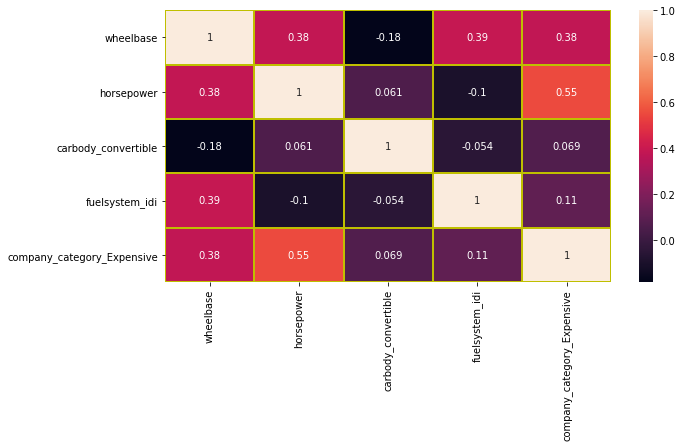

In [76]:
plt.figure(figsize = (10,5))  
sns.heatmap(X_train_rfe.corr(),annot = True, linewidths=1, linecolor='y')

All the independent variable have considerably low VIF and the Adj. R-Squared is 0.909.

We will conclude with these variables as the final model predictor variables.

In [77]:
y_train_price = lm.predict(X_train_lm)

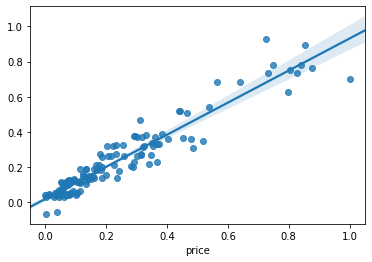

In [78]:
# Final Linear regression plot on train dataset
sns.regplot(y_train,y_train_price,'r')

Text(0, 0.5, 'Views')

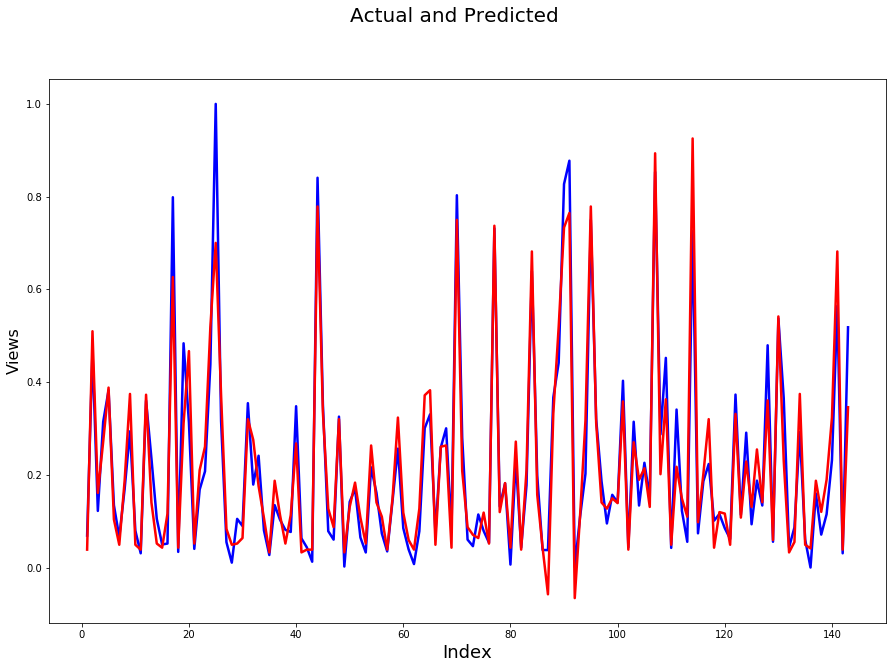

In [79]:
#Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure(figsize=(15,10))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_price, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 

<Figure size 720x720 with 0 Axes>

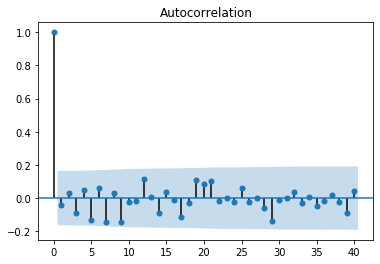

In [80]:
# TSA Plot on Train data
fig = plt.figure(figsize=(10,10))
sm.graphics.tsa.plot_acf(y_train-y_train_price, lags=40)
plt.show()

# Residual Analysis of the Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

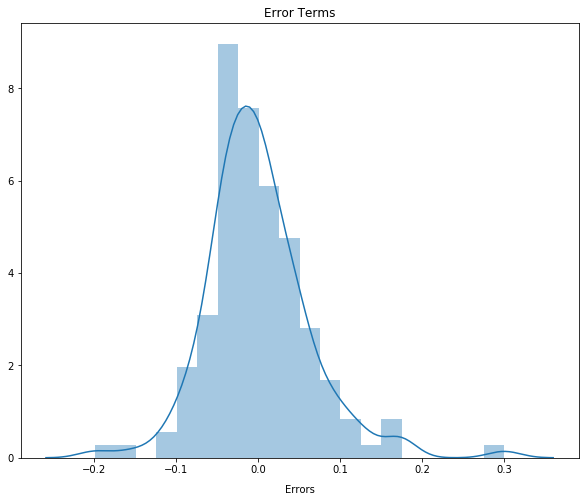

In [81]:
# Distribution Plot
plt.figure(figsize = (10, 8))

sns.distplot((y_train - y_train_price), bins = 20)

plt.xlabel('Errors', labelpad = 10)
plt.title('Error Terms')
plt.show()

# Making Predictions

Applying the scaling on the test sets

In [82]:
# Perform scaling on list of variables which are picked in train dataset
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio',
            'car_dimension','stroke','compressionratio','peakrpm','price','hc_mpg_ratio']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [83]:
# Seperating y_test and x_test
y_test = df_test.pop('price')
X_test = df_test

In [84]:
# Let's have a look at overall statistics of test dataset after scaling
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,car_dimension,hc_mpg_ratio,symboling_moderate,symboling_risky,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_category_Expensive,company_category_Lowprice,company_category_Midprice
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.89,0.82,0.44,0.97,0.44,0.43,0.27,0.56,0.54,0.21,0.25,0.39,0.48,0.37,0.45,0.39,0.16,0.03,0.08,0.34,0.45,0.10,0.02,0.56,0.42,0.03,0.00,0.05,0.81,0.05,0.06,0.00,0.03,0.03,0.85,0.08,0.00,0.00,0.00,0.05,0.26,0.00,0.11,0.52,0.05,0.02,0.11,0.60,0.29
std,0.32,0.39,0.50,0.18,0.21,0.18,0.16,0.23,0.16,0.27,0.16,0.19,0.21,0.13,0.50,0.49,0.37,0.18,0.27,0.48,0.50,0.30,0.13,0.50,0.50,0.18,0.00,0.22,0.40,0.22,0.25,0.00,0.18,0.18,0.36,0.27,0.00,0.00,0.00,0.22,0.44,0.00,0.32,0.50,0.22,0.13,0.32,0.49,0.46
min,0.00,0.00,0.00,0.00,0.00,0.13,0.07,-0.11,-0.06,0.00,0.02,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.00,0.31,0.31,0.18,0.40,0.48,0.09,0.11,0.27,0.32,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,1.00,0.39,0.41,0.23,0.56,0.59,0.12,0.22,0.35,0.47,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,1.00,1.00,1.00,0.57,0.56,0.32,0.75,0.64,0.15,0.30,0.54,0.65,0.41,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.18,0.94,0.93,0.89,0.86,1.00,0.66,1.00,1.07,0.73,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [85]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
# Making predictions
y_pred = lm.predict(X_test_new)

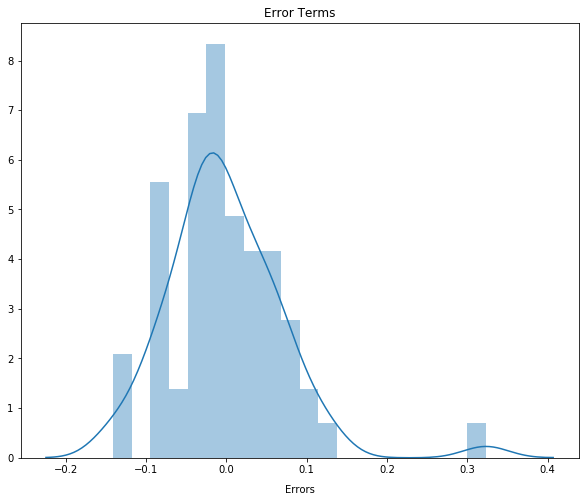

In [87]:
# Residual Plot on Test Data
# Distribution Plot
plt.figure(figsize = (10, 8))

sns.distplot((y_test - y_pred), bins = 20)

plt.xlabel('Errors', labelpad = 10)
plt.title('Error Terms')
plt.show()

Text(0, 0.5, 'Price')

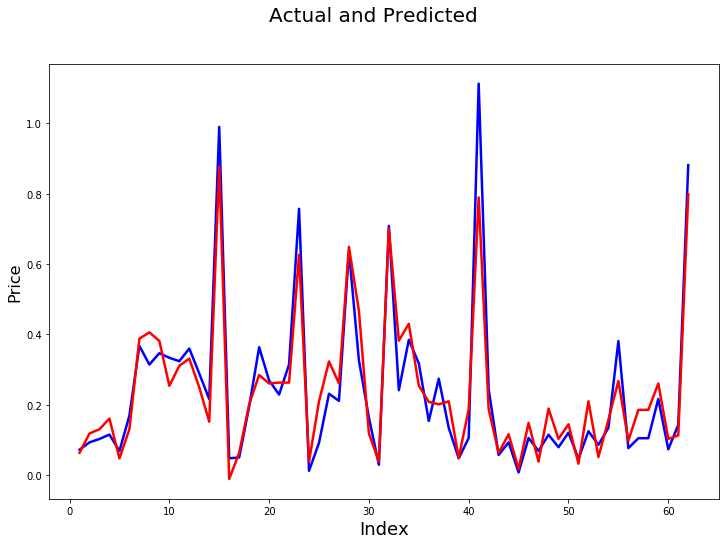

In [88]:
#Actual vs Predicted on Test Data
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16) 

<Figure size 720x720 with 0 Axes>

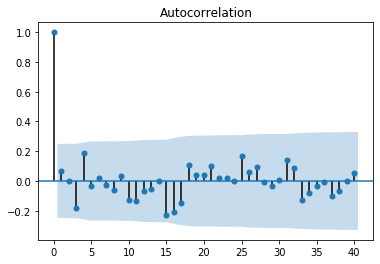

In [89]:
#TSA Pllot on Test data
fig = plt.figure(figsize=(10,10))
sm.graphics.tsa.plot_acf(y_test-y_pred, lags=40)
plt.show()

# Model Evaluation

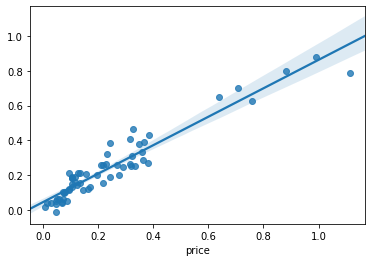

In [90]:
# Final Linear regression plot on test dataset
sns.regplot(y_test,y_pred,'r')

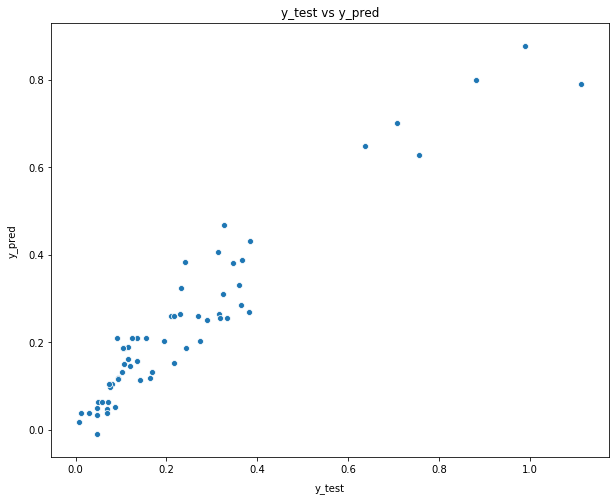

In [91]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (10, 8))

sns.scatterplot(x = y_test, y = y_pred)

plt.xlabel('y_test', labelpad = 10)
plt.ylabel('y_pred', labelpad = 10)
plt.title('y_test vs y_pred')
plt.show()


<font size='4'> Insights: </font> 
    - From y_test vs y_pred scatter plot, we can say there are are some variations at the higher end but overall it can be fitted as a decent linear model.

In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)


# Below code must be used as per assignment guidelines
from sklearn.metrics import r2_score                                                             
r2=r2_score(y_test, y_pred)                                                                     
print('Model r2_score:',r2)                                                                      


Model RMSE: 0.0729518660921332
Model r2_score: 0.900427492554006


# Final Inference

<font size='4'>Variables which are significant in predicting the price of a car</font>
    - Final predictors and their corresponding Coefficients, p values and VIF values are:

 <table style="width:100%">
  <tr>
    <th>Variable Name</th>
    <th>Coefficient Value</th>
    <th>P-Value</th>
    <th>VIF</th>
  </tr>
  <tr>
    <td>horsepower</td>
    <td>0.6243</td>
    <td>0.000</td>
    <td>4.44</td>
  </tr>
  <tr>
    <td>wheelbase</td>
    <td>0.2872</td>
    <td>0.000</td>
    <td>4.33</td>
  </tr>
  <tr>
    <td>company_category_Expensive</td>
    <td>0.2681</td>
    <td>0.000</td>
    <td>1.56</td>
  </tr>
  <tr>
    <td>carbody_convertible</td>
    <td>0.1717</td>
    <td>0.000</td>
    <td>1.05</td>
  </tr>
  <tr>
    <td>fuelsystem_idi</td>
    <td>0.0706</td>
    <td>0.001</td>
    <td>1.43</td>
  </tr>
  
</table> 

Equation of best fitted line is:

$ price = -0.0838 + 0.2872 \times wheelbase + 0.6243 \times horsepower + 0.1717 \times carbody\_convertible + 0.0706 \times fuelsystem\_idi + 0.2681 \times company\_category\_Expensive $


1. The price of the car changes by 0.2872 for every unit change in the wheelbase dimension if all other variables are held constant. And so is true for all other variables.
2. The predictor carbody_convertible suggest that the price of car increases by 0.1717 when the car body is convertible.
3. The fuelsystem_idi is causes 0.0707 times change in price if other variables are held constant.
4. The company name is also essential in determining the price of the automobile. High tier companies' names like BMW, Buik, Porsche and Jaguar further add up to the price by 0.2681.
5. Overall we have a decent model with the following metrics as show below:

<table style="width:100%">
  <tr>
    <th>Adjusted R-Squared</th>
    <th>r2_score</th>
    <th>Prob (F-Statistic)</th>
    <th>AIC</th>
    <th>BIC</th>
    <th>RMSE</th>
  </tr>
  <tr>
    <td>0.909</td>
    <td>0.900</td>
    <td>1.94e-70</td>
    <td>-369.4</td>
    <td>-351.6</td>
    <td>0.073</td>
  </tr>
</table>

<font> We have a couple of options:</font>

    - Add new features (Dimension, Cylinders count etc)
    - Build a non-linear model

<font size='4' color='orange'> Submitted By : Chandan Kumar</font>
